In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dftrain=pd.read_csv("/content/Amharic News Dataset.csv")

In [ ]:
dftrain

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012
...,...,...,...,...,...,...
51478,የ2011 በጀት ዓመት የውጭ ዲሎማሲያዊ ተግባራት ስኬታማ እንደነበሩ ተገለጸ,ፖለቲካ,"July 26, 2019",Unknown,በ2011 በጀት ዓመት የተከናወኑ የውጭ ዲፕሎማሲያዊ ተግባራት ስኬታማ እን...,https://waltainfo.com/am/31264/
51479,አቶ አገኘሁ ተሻገር የሰላም ግንባታና የሕዝብ ደህንነት ኃላፊ ሆነው ተሾሙ,ፖለቲካ,"July 25, 2019",Unknown,አቶ አገኘሁ ተሻገር የአማራ ክልል የሰላም ግንባታና የህዝብ ደህንነት ቢሮ...,https://waltainfo.com/am/31259/
51480,የአማራ ክልል ምክር ቤት የ230 ዳኞችን ሹመት አጸደቀ,ፖለቲካ,"July 25, 2019",Unknown,የአማራ ክልል ምክር ቤት የ230 ዳኞችን ሹመት አጸደቀየአማራ ክልል ምክር...,https://waltainfo.com/am/31260/
51481,ሃምሌ 22 ለሚካሄደው የችግኝ ተከላ መርሀ-ግብር 54 ሚሊየን ብር ተመድቧል,ሀገር አቀፍ ዜና,"July 25, 2019",Unknown,በዘንድሮ በጀት ዓመት ከ4 ቢሊዮን ችግኝ በላይ ለመትከል እቅድ መያዙ ይታ...,https://waltainfo.com/am/32585/


In [ ]:
dfvalid=pd.read_csv("/content/drive/MyDrive/hope/english dATA SET/val.csv")

In [ ]:
dfvalid

,text,binary,multiclass,id
0,She should be proving herself to you. Successf...,Not Hope,Not Hope,3229
1,The female desire for tall men comes from thei...,Not Hope,Not Hope,36
2,“The inside of the old Camaro smelled like asp...,Not Hope,Not Hope,136
3,The villa must be boring during the day if the...,Not Hope,Not Hope,1970
4,#USER# #USER# #USER# #USER# #USER# #USER# #USE...,Hope,Generalized Hope,1569
...,...,...,...,...
1027,#USER# #USER# #USER# #USER# Going backwards to...,Not Hope,Not Hope,612
1028,#USER# Wouldn’t want to own any of the discuss...,Hope,Realistic Hope,7562
1029,#USER# #USER# I wouldn't be surprised if Roone...,Hope,Realistic Hope,6467
1030,#USER# It will be a honorable thing if u can r...,Not Hope,Not Hope,1816


In [ ]:
dfvalid["multiclass"].value_counts()

,count
multiclass,
Not Hope,502
Generalized Hope,300
Realistic Hope,128
Unrealistic Hope,102


In [ ]:
dftest=pd.read_csv("/content/drive/MyDrive/hope/english dATA SET/Task 2_Test_with_labels_English_PolyHope.csv")

In [ ]:
dftest

,text,binary,multiclass,id
0,Volatility term structure is trading back in c...,Not Hope,Not Hope,1120
1,#USER# Very sad last night - we were up two ga...,Hope,Generalized Hope,4300
2,"my mind is continuously looping through ""vacat...",Not Hope,Not Hope,1008
3,#USER# i used to go around with my one armed g...,Hope,Generalized Hope,8003
4,#USER# Do we know the episode count for this s...,Not Hope,Not Hope,3449
...,...,...,...,...
1027,#USER# #USER# #USER# Still doesn't tell me any...,Not Hope,Not Hope,6038
1028,"#USER# ahh okay i get it! thanks for the info,...",Not Hope,Not Hope,4592
1029,#USER# #USER# #USER# I'm once again hopeful fo...,Hope,Realistic Hope,1012
1030,#USER# I'm not so theologically illiterate tha...,Not Hope,Not Hope,5004


# Binary modeling

In [ ]:
import pandas as pd

dftrain = dftrain[['id', 'text', 'binary']]
print(dftrain)
dftrain

        id                                               text    binary
0     5820  #USER# #USER# I'm really liking this project, ...      Hope
1     4061  #USER# Oh shit really? I would hope they'd she...      Hope
2     1621  #USER# Good morning, Bud! 🥰 Another good decis...      Hope
3     1754  i aspire to have the level of delusion to beli...      Hope
4      401  #USER# #USER# Projects are continuously attack...  Not Hope
...    ...                                                ...       ...
6187  3889  🌟: But, it was a great depiction of the main c...  Not Hope
6188  3945  Because it's brave to outright misappropriate ...  Not Hope
6189  6736  #USER# They got this one wrong. I'm a devout, ...  Not Hope
6190  4845  #USER# #USER# Not even close. Myself as many o...  Not Hope
6191  4753  #USER# 💯 agree mate. Started doing this a few ...  Not Hope

[6192 rows x 3 columns]


,id,text,binary
0,5820,"#USER# #USER# I'm really liking this project, ...",Hope
1,4061,#USER# Oh shit really? I would hope they'd she...,Hope
2,1621,"#USER# Good morning, Bud! 🥰 Another good decis...",Hope
3,1754,i aspire to have the level of delusion to beli...,Hope
4,401,#USER# #USER# Projects are continuously attack...,Not Hope
...,...,...,...
6187,3889,"🌟: But, it was a great depiction of the main c...",Not Hope
6188,3945,Because it's brave to outright misappropriate ...,Not Hope
6189,6736,"#USER# They got this one wrong. I'm a devout, ...",Not Hope
6190,4845,#USER# #USER# Not even close. Myself as many o...,Not Hope


In [ ]:
import pandas as pd

dfvalid = dfvalid[['id', 'text', 'binary']]
dfvalid

,id,text,binary
0,3229,She should be proving herself to you. Successf...,Not Hope
1,36,The female desire for tall men comes from thei...,Not Hope
2,136,“The inside of the old Camaro smelled like asp...,Not Hope
3,1970,The villa must be boring during the day if the...,Not Hope
4,1569,#USER# #USER# #USER# #USER# #USER# #USER# #USE...,Hope
...,...,...,...
1027,612,#USER# #USER# #USER# #USER# Going backwards to...,Not Hope
1028,7562,#USER# Wouldn’t want to own any of the discuss...,Hope
1029,6467,#USER# #USER# I wouldn't be surprised if Roone...,Hope
1030,1816,#USER# It will be a honorable thing if u can r...,Not Hope


In [ ]:
import pandas as pd
import re

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()

    return text
dftrain['text'] = dftrain['text'].apply(preprocess_text)

dfvalid['text'] = dfvalid['text'].apply(preprocess_text)

dftest['text'] = dftest['text'].apply(preprocess_text)



In [ ]:
dftrain

,id,text,binary
0,5820,user user im really liking this project lets w...,Hope
1,4061,user oh shit really i would hope theyd shed so...,Hope
2,1621,user good morning bud another good decision f...,Hope
3,1754,i aspire to have the level of delusion to beli...,Hope
4,401,user user projects are continuously attacked b...,Not Hope
...,...,...,...
6187,3889,but it was a great depiction of the main char...,Not Hope
6188,3945,because its brave to outright misappropriate f...,Not Hope
6189,6736,user they got this one wrong im a devout pract...,Not Hope
6190,4845,user user not even close myself as many others...,Not Hope


In [ ]:
dfvalid

,id,text,binary
0,3229,she should be proving herself to you successfu...,Not Hope
1,36,the female desire for tall men comes from thei...,Not Hope
2,136,the inside of the old camaro smelled like asph...,Not Hope
3,1970,the villa must be boring during the day if the...,Not Hope
4,1569,user user user user user user user user user u...,Hope
...,...,...,...
1027,612,user user user user going backwards to this i...,Not Hope
1028,7562,user wouldnt want to own any of the discussed ...,Hope
1029,6467,user user i wouldnt be surprised if rooney pai...,Hope
1030,1816,user it will be a honorable thing if u can rep...,Not Hope


In [ ]:
dftest

,text,binary,multiclass,id
0,volatility term structure is trading back in c...,Not Hope,Not Hope,1120
1,user very sad last night we were up two games...,Hope,Generalized Hope,4300
2,my mind is continuously looping through vacati...,Not Hope,Not Hope,1008
3,user i used to go around with my one armed gla...,Hope,Generalized Hope,8003
4,user do we know the episode count for this ser...,Not Hope,Not Hope,3449
...,...,...,...,...
1027,user user user still doesnt tell me anything h...,Not Hope,Not Hope,6038
1028,user ahh okay i get it thanks for the info i r...,Not Hope,Not Hope,4592
1029,user user user im once again hopeful for drago...,Hope,Realistic Hope,1012
1030,user im not so theologically illiterate that i...,Not Hope,Not Hope,5004


In [ ]:
import pandas as pd
dftrain.rename(columns={'binary': 'label'}, inplace=True)
dfvalid.rename(columns={'binary': 'label'}, inplace=True)

# Replace text 'Not hope' with 0 and 'hope' with 1 in 'text' column for training dataset
#dftrain['label'] = dftrain['label'].replace({'Not Hope': 0, 'Hope': 1})

# Replace text 'Not hope' with 0 and 'hope' with 1 in 'text' column for validation dataset
#dfvalid['label'] = dfvalid['label'].replace({'Not Hope': 0, 'Hope': 1})


In [ ]:
dftrain

,id,text,label
0,5820,user user im really liking this project lets w...,Hope
1,4061,user oh shit really i would hope theyd shed so...,Hope
2,1621,user good morning bud another good decision f...,Hope
3,1754,i aspire to have the level of delusion to beli...,Hope
4,401,user user projects are continuously attacked b...,Not Hope
...,...,...,...
6187,3889,but it was a great depiction of the main char...,Not Hope
6188,3945,because its brave to outright misappropriate f...,Not Hope
6189,6736,user they got this one wrong im a devout pract...,Not Hope
6190,4845,user user not even close myself as many others...,Not Hope


In [ ]:
dfvalid

,id,text,label
0,3229,she should be proving herself to you successfu...,Not Hope
1,36,the female desire for tall men comes from thei...,Not Hope
2,136,the inside of the old camaro smelled like asph...,Not Hope
3,1970,the villa must be boring during the day if the...,Not Hope
4,1569,user user user user user user user user user u...,Hope
...,...,...,...
1027,612,user user user user going backwards to this i...,Not Hope
1028,7562,user wouldnt want to own any of the discussed ...,Hope
1029,6467,user user i wouldnt be surprised if rooney pai...,Hope
1030,1816,user it will be a honorable thing if u can rep...,Not Hope


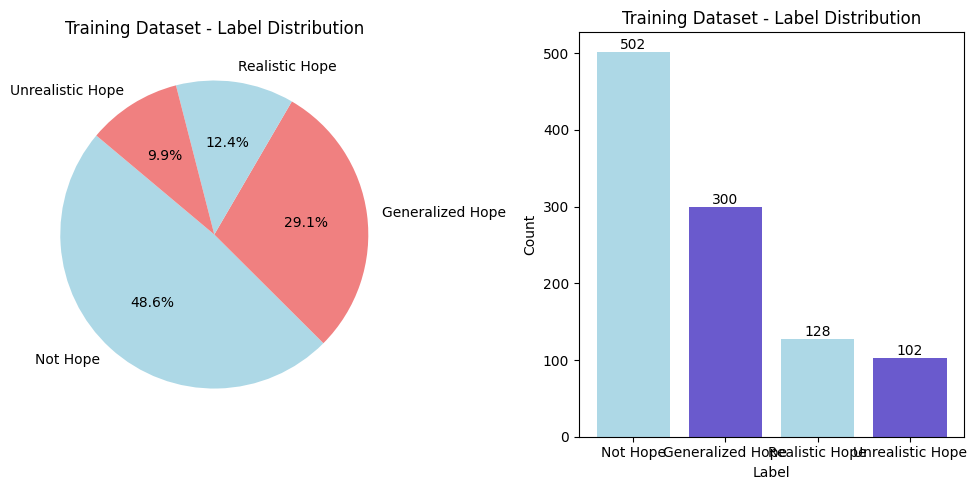

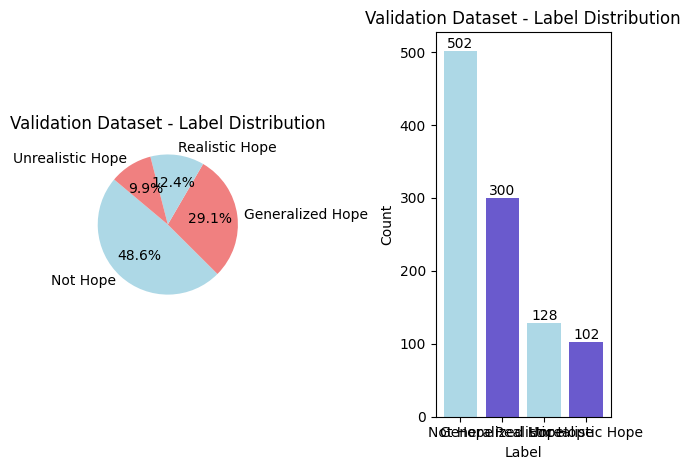

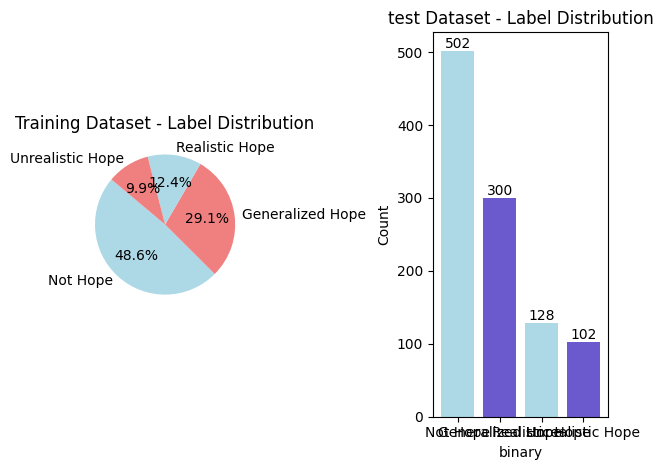

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pie_colors = ['lightblue', 'lightcoral']
bar_colors = ['lightblue', 'slateblue']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
labels_train = dfvalid["multiclass"].value_counts().index
sizes_train = dfvalid["multiclass"].value_counts().values
plt.pie(sizes_train, labels=labels_train, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Training Dataset - Label Distribution')

# Bar Plot for Training Dataset
plt.subplot(1, 2, 2)
plt.bar(labels_train, sizes_train, color=bar_colors)
for i, v in enumerate(sizes_train):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Training Dataset - Label Distribution')

plt.tight_layout()
plt.show()

#Pie Plot for Validation Dataset
plt.subplot(1, 2, 1)
labels_val = dfvalid["multiclass"].value_counts().index
sizes_val = dfvalid["multiclass"].value_counts().values
plt.pie(sizes_val, labels=labels_val, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Validation Dataset - Label Distribution')

# Bar Plot for Validation Dataset
plt.subplot(1, 2, 2)
plt.bar(labels_val, sizes_val, color=bar_colors)
for i, v in enumerate(sizes_val):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Validation Dataset - Label Distribution')

plt.tight_layout()
plt.show()
# Pie Plot for Test Dataset
plt.subplot(1, 2, 1)
labels_test = dfvalid["multiclass"].value_counts().index
sizes_test = dfvalid["multiclass"].value_counts().values
plt.pie(sizes_train, labels=labels_train, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Training Dataset - Label Distribution')

# Bar Plot for test Dataset
plt.subplot(1, 2, 2)
plt.bar(labels_test, sizes_val, color=bar_colors)
for i, v in enumerate(sizes_val):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('binary')
plt.ylabel('Count')
plt.title('test Dataset - Label Distribution')

plt.tight_layout()
plt.show()


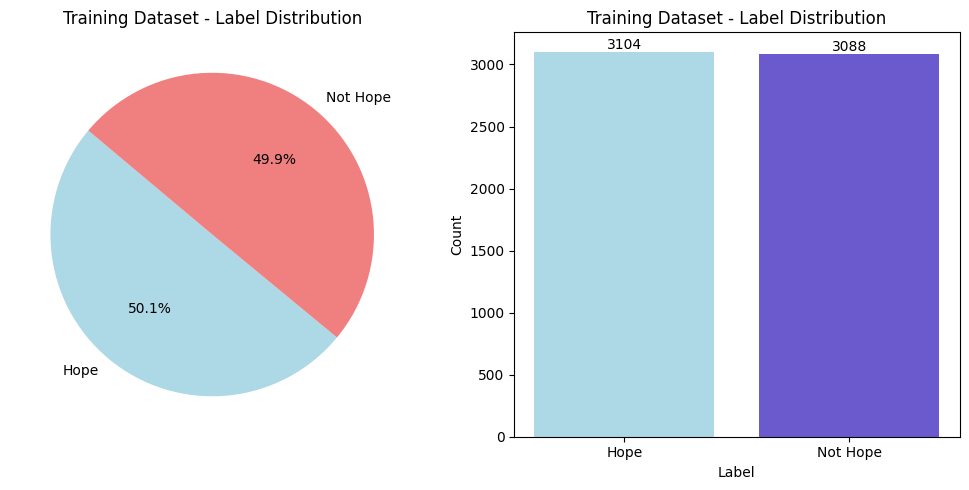

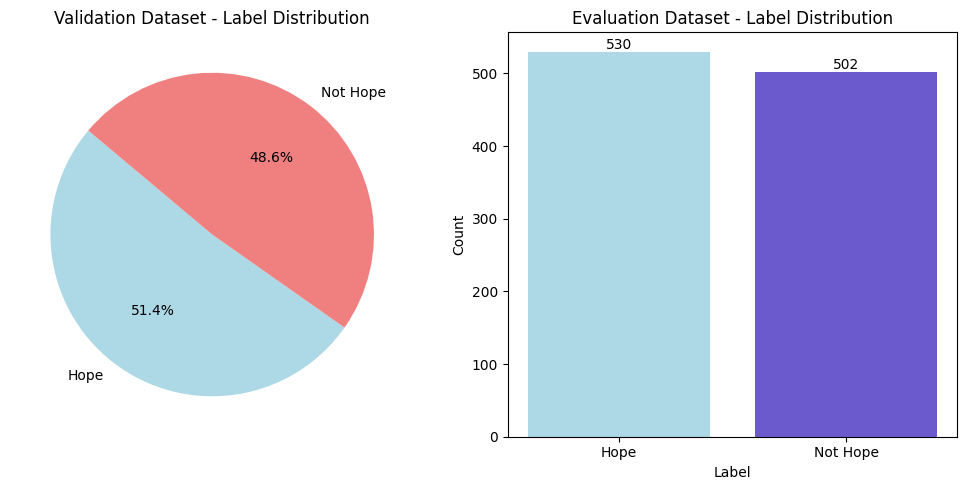

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pie_colors = ['lightblue', 'lightcoral']
bar_colors = ['lightblue', 'slateblue']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
labels_train = dftrain['label'].value_counts().index
sizes_train = dftrain['label'].value_counts().values
plt.pie(sizes_train, labels=labels_train, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Training Dataset - Label Distribution')

plt.subplot(1, 2, 2)
plt.bar(labels_train, sizes_train, color=bar_colors)
for i, v in enumerate(sizes_train):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Training Dataset - Label Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
labels_val = dfvalid['label'].value_counts().index
sizes_val = dfvalid['label'].value_counts().values
plt.pie(sizes_val, labels=labels_val, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Validation Dataset - Label Distribution')

plt.subplot(1, 2, 2)
plt.bar(labels_val, sizes_val, color=bar_colors)
for i, v in enumerate(sizes_val):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Evaluation Dataset - Label Distribution')

plt.tight_layout()
plt.show()


## algortihms

In [ ]:
docs = list(dftrain['text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 200)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
X_train = docs
y_train = dftrain['label']
print(X_train.shape, y_train.shape)

In [ ]:
docsval = list(dfvalid['text'])
tfidf_vectorizer_val = TfidfVectorizer(use_idf=True, max_features = 200)
tfidf_vectorizer_vectors_val = tfidf_vectorizer_val.fit_transform(docsval)
docsval = tfidf_vectorizer_vectors_val.toarray()

In [ ]:
X_val = docsval
y_valid = dfvalid['label']
print(X_val.shape, y_valid.shape)

In [ ]:
docstest = list(dftest['text'])
tfidf_vectorizer_test = TfidfVectorizer(use_idf=True, max_features = 200)
tfidf_vectorizer_vectors_test = tfidf_vectorizer_test.fit_transform(docstest)
docstest = tfidf_vectorizer_vectors_test.toarray()

In [ ]:
X_test = docstest
#y_valid = dfvalid['label']
print(X_test.shape)
      #, y_valid.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_valid,predictions))
print(classification_report(y_valid,predictions))
print(accuracy_score(y_valid, predictions))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_valid,predictions))
print(classification_report(y_valid,predictions))
print(accuracy_score(y_valid, predictions))

In [ ]:
X_train=dftrain["text"]
y_train=dftrain["label"]

X_test=dfvalid["text"]
y_test=dfvalid["label"]

In [ ]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

embedding_dim = 100
lstm_units = 64
num_classes = 2

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



In [ ]:
y_pred_probs = model.predict(X_test_pad)
y_pred = [1 if prob[1] > 0.5 else 0 for prob in y_pred_probs]

In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
df=pd.DataFrame()
df['id']=dfvalid.id.values
df['category']=y_pred
df['category'] = df['category'].replace({0: 'Not Hope', 1: 'Hope'})

df.to_csv("/content/drive/MyDrive/hope/english dATA SET/Task 2 Training set (English).csv",index=False)

In [ ]:
!pip install ktrain

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text
import pandas as pd

In [ ]:
!pip install --upgrade ktrain
!pip install tensorflow-addons

In [ ]:
from sklearn.model_selection import train_test_split

X_train= dftrain["text"].values
y_train= dftrain["label"].values


X_val= dfvalid["text"].values
y_val= dfvalid["label"].values



In [ ]:
import ktrain
from ktrain import text

(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder('data', maxlen=500, preprocess_mode='bert')

model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)
learner.fit_onecycle(2e-5, 1)


In [ ]:
import ktrain
from ktrain import text
import numpy as np
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

MODEL_NAME = 'google/bert_uncased_L-12_H-768_A-12'

t = text.Transformer(MODEL_NAME, maxlen=400, classes=np.array([0,1]))
trn = t.preprocess_train(np.array(X_train), np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()

learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)
learner.optimizer = optimizer



In [ ]:
learner.fit_onecycle(1e-5, 3)

In [ ]:
pred = ktrain.get_predictor(learner.model,preproc = t)

In [ ]:
predictor_1=pred.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_val,predictor_1))
print(accuracy_score(y_val, predictor_1))

In [ ]:
df=pd.DataFrame()
df['id']=dfvalid.id.values
df['category']=predictor_1
df['category'] = df['category'].replace({0: 'Not Hope', 1: 'Hope'})

df.to_csv("/content/drive/MyDrive/hope project/Task_2_Training_and_Validation_set_/model3prediction.csv",index=False)

# MULTI modeling

In [ ]:
import pandas as pd
dftrain = dftrain[['id', 'text', 'multiclass']]
dftrain

In [ ]:
import pandas as pd

dfvalid = dfvalid[['id', 'text', 'multiclass']]
dfvalid

In [ ]:
import pandas as pd
import re

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()

    return text

# Assuming df_train and df_val are your DataFrames for training and validation datasets
# Apply preprocessing function to 'text' column for training dataset
dftrain['text'] = dftrain['text'].apply(preprocess_text)

# Apply preprocessing function to 'text' column for validation dataset
dfvalid['text'] = dfvalid['text'].apply(preprocess_text)


In [ ]:
dftrain

In [ ]:
dfvalid

In [ ]:
dftrain.multiclass.value_counts()

In [ ]:
import pandas as pd

dftrain.rename(columns={'multiclass': 'label'}, inplace=True)
dfvalid.rename(columns={'multiclass': 'label'}, inplace=True)

dftrain['label'] = dftrain['label'].replace({'Not Hope': 0, 'Generalized Hope': 1, 'Unrealistic Hope': 2, 'Realistic Hope': 3})

dfvalid['label'] = dfvalid['label'].replace({'Not Hope': 0, 'Generalized Hope': 1, 'Unrealistic Hope': 2, 'Realistic Hope': 3})


In [ ]:
dftrain

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pie_colors = ['lightblue', 'lightcoral']
bar_colors = ['skyblue', 'salmon']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
labels_train = dftrain['label'].value_counts().index
sizes_train = dftrain['label'].value_counts().values
plt.pie(sizes_train, labels=labels_train, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Training Dataset - Label Distribution')

plt.subplot(1, 2, 2)
plt.bar(labels_train, sizes_train, color=bar_colors)
for i, v in enumerate(sizes_train):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Training Dataset - Label Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
labels_val = dfvalid['label'].value_counts().index
sizes_val = dfvalid['label'].value_counts().values
plt.pie(sizes_val, labels=labels_val, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Validation Dataset - Label Distribution')

plt.subplot(1, 2, 2)
plt.bar(labels_val, sizes_val, color=bar_colors)
for i, v in enumerate(sizes_val):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Validation Dataset - Label Distribution')

plt.tight_layout()
plt.show()


## algortihms

In [ ]:
docs = list(dftrain['text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 200)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
X_train = docs
y_train = dftrain['label']
print(X_train.shape, y_train.shape)

In [ ]:
docsval = list(dfvalid['text'])
tfidf_vectorizer_val = TfidfVectorizer(use_idf=True, max_features = 200)
tfidf_vectorizer_vectors_val = tfidf_vectorizer_val.fit_transform(docsval)
docsval = tfidf_vectorizer_vectors_val.toarray()

In [ ]:
X_val = docsval
y_valid = dfvalid['label']
print(X_val.shape, y_valid.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_valid,predictions))
print(classification_report(y_valid,predictions))
print(accuracy_score(y_valid, predictions))

In [ ]:
df=pd.DataFrame()
df['id']=dfvalid.id.values
df['category']=predictions
# Define a dictionary to map numeric values to their original text values
label_mapping = {0: 'Not Hope', 1: 'Generalized Hope', 2: 'Unrealistic Hope', 3: 'Realistic Hope'}

# Replace numeric values with their original text values in the 'label' column
df['category'] = df['category'].map(label_mapping)
df.to_csv("/content/drive/MyDrive/hope project/Task_2_Training_and_Validation_sets/model1task2englishpred.csv",index=False)

In [ ]:
df

In [ ]:
X_train=dftrain["text"]
y_train=dftrain["label"]

X_test=dfvalid["text"]
y_test=dfvalid["label"]

In [ ]:
# Declaring train labels
train_labels = dftrain['label']
test_labels = dfvalid['label']

In [ ]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

In [ ]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170
max_words = 2500

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words
tokenizer.fit_on_texts(dftrain.text)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(dftrain.text)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(dfvalid.text)

In [ ]:
# Fixing the sequence length
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences, maxlen = max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen = max_sequence_length)
train_data.shape, test_data.shape

In [ ]:
embedding_dim = 32
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
# Model Training
model = Sequential()
model.add(Embedding(max_words,
                   embedding_dim,
                   input_length=max_sequence_length))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.2, recurrent_dropout=0)))

model.add(GlobalMaxPool1D())

model.add(Dense(4,activation='softmax'))

model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [ ]:
# declaring weights of product categories
class_weight = {0: 4,
                1: 5,
                2: 5,
                3: 5
                }

# training and validating model
history = model.fit(train_data, train_labels, batch_size=64, epochs= 10, class_weight = class_weight, validation_data=(test_data, test_labels)) # best 89(now) or 48 or 60 epochs # default epochs = 23 # batch_size changed to 1 (takes 2.30hrs) from 16

In [ ]:
# Prediction on Test Data
predicted_bi_lstm = model.predict(test_data)
predicted_bi_lstm

In [ ]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(test_labels, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels, predicted_bi_lstm.round()))

In [ ]:
df=pd.DataFrame()
df['id']=dfvalid.id.values
df['category']=predictions
# Define a dictionary to map numeric values to their original text values
label_mapping = {0: 'Not Hope', 1: 'Generalized Hope', 2: 'Unrealistic Hope', 3: 'Realistic Hope'}

# Replace numeric values with their original text values in the 'label' column
df['category'] = df['category'].map(label_mapping)
df.to_csv("/content/drive/MyDrive/hope project/Task_2_Training_and_Validation_sets/model2task2englishpred.csv",index=False)

In [ ]:
!pip install ktrain

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

X_train= dftrain["text"].values
y_train= dftrain["label"].values


X_val= dfvalid["text"].values
y_val= dfvalid["label"].values



In [ ]:
MODEL_NAME = 'google-bert/bert-base-multilingual-uncased'

t = text.Transformer(MODEL_NAME, maxlen=400, classes=np.array([0,1,2,3]))
trn = t.preprocess_train(np.array(X_train),np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

In [ ]:
learner.fit_onecycle(1e-5, 3)

In [ ]:
pred = ktrain.get_predictor(learner.model,preproc = t)

In [ ]:
predictor_1=pred.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_val,predictor_1))
print(accuracy_score(y_val, predictor_1))

In [ ]:
df=pd.DataFrame()
df['id']=dfvalid.id.values
df['category']=predictions
# Define a dictionary to map numeric values to their original text values
label_mapping = {0: 'Not Hope', 1: 'Generalized Hope', 2: 'Unrealistic Hope', 3: 'Realistic Hope'}

# Replace numeric values with their original text values in the 'label' column
df['category'] = df['category'].map(label_mapping)
df.to_csv("/content/drive/MyDrive/hope project/Task_2_Training_and_Validation_set_/task2model2prediction.csv",index=False)